### 특성(Feature)공학과 규제(Regularization :정형화, 규제, 일반화)


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Data/fish.csv")
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


> 길이,높이,두께로 구성된 Data

In [3]:
# Numpy로 변환
fish_full = df.to_numpy()
fish_full[0:6]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32]])

In [4]:
df = pd.read_csv("../Data/fish_weight.csv")
df.head()

,weight
0,5.9
1,32.0
2,40.0
3,51.5
4,70.0


In [5]:
fish_weight = df.to_numpy()
fish_weight[0:6]

array([[  5.9],
       [ 32. ],
       [ 40. ],
       [ 51.5],
       [ 70. ],
       [100. ]])

In [6]:
# Train과 Test로 분리
from sklearn.model_selection import train_test_split

In [7]:
train_input,test_input,train_target,test_target = train_test_split(
    fish_full,fish_weight,random_state=42
)

In [8]:
# 다중회귀 분석
from sklearn.preprocessing import PolynomialFeatures

---
### 다항 특성 만들기 연습

In [9]:
poly = PolynomialFeatures()

In [10]:
poly.fit([[2,3]])

PolynomialFeatures()

In [11]:
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


> 1: 절편, &nbsp; 2:X, &nbsp; 3:Y, &nbsp;  4:X^2, &nbsp;  6:X*Y, &nbsp;  9:Y^2     
절편이 발생하는 경우 Y = aX + b --> Y = aX + b1의 구조    
[a,b] * [x,1]   

In [12]:
# 절편이 필요 없느 경우
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


---
### 다항 특성 만들기

In [13]:
# train_input으로 다항 특성 만들기
poly = PolynomialFeatures(include_bias=False) # degree = 2 <- default (숫자가 커질수록 컬럼늘어남) 
# 제곱하는 방법이 두개 생김 => 자기자신의 제곱 , 옆에있는애랑 곱
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [14]:
train_poly.shape # column 세배 늘어남

(42, 9)

> 컬럼수가 원래는 3개였는데 9개로 확장 되었다.

In [15]:
# 컬럼 정보 확인
poly.get_feature_names() # 'x0', 'x1', 'x2' <- 기존 컬럼

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [17]:
# test_input을 다항 특성 만들기
test_poly = poly.transform(test_input)

---
### 다중 회귀 모델 훈련하기


In [18]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(train_poly,train_target)
print("train score : ",lr.score(train_poly,train_target))
print("test score : ",lr.score(test_poly,test_target))

train score :  0.9903183436982125
test score :  0.9714559911594155


---
### 더 많은 특성 만들기

In [19]:
poly = PolynomialFeatures(include_bias=False,degree=5)
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

In [20]:
print(train_poly.shape,test_poly.shape)

(42, 55) (14, 55)


In [21]:
# 컬럼 정보 확인
poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [22]:
# 모델 확인하기
lr.fit(train_poly,train_target)
print("train score :",lr.score(train_poly,train_target))
print("test score :",lr.score(test_poly,test_target))

train score : 0.9999999999938143
test score : -144.40744533753661


> train의 경우는 거의 완벽하였지만 test는 엉망이다.        
> 과대적합이 발생하였다.       
> 이런 경우(과대적합) 사용하는 것이 규제이다.

---
### 규제(Regularization :정형화, 규제, 일반화)
모델이 과적합되게 학습하지 않고 일반성을 가질 수 있도록 규제(정규화)하는 것.

### 규제 전에 표준화
: 표준점수(Z점수)를 sklearn을 사용

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_poly)
test_scaled = ss.transform(test_poly)

### Ridge 규제(L2규제)
:가중치의 제곱으로 규제하는 방법이다.

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print("train score :",ridge.score(train_scaled,train_target))
print("test score :",ridge.score(test_scaled,test_target))

train score : 0.9896101671037343
test score : 0.9790693977615386


In [25]:
# 적절한 규제강도(Hyper Parameter)찾기
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100] # 임의로 정한다.
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

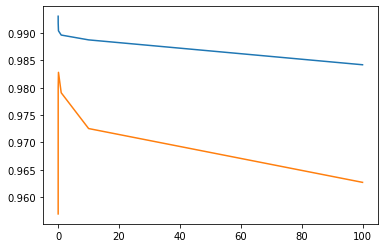

In [28]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(alpha_list,train_score)
plt.plot(alpha_list,test_score)

plt.show()

> x축의 데이터 범위가 너무 커서 소수인 경우에는 확인할 수 없음       
> log를 사용해 데이터 범위의 축소 및 규칙화

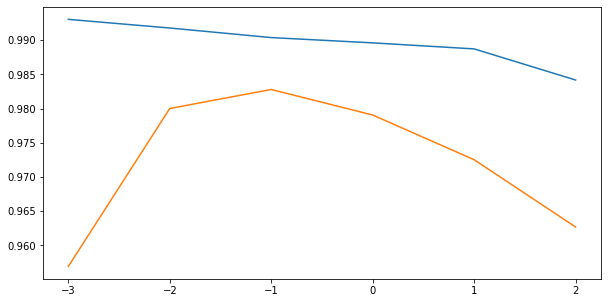

In [29]:
# 시각화 화기
import numpy as np

plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)

plt.show()

> train(blue)과 test(orange)의 간격이 가장 좁을 때가 좋음         

> alpha가 -1인 경우가 train과 test의 간격이 제일 가깝다 (골디락스(Goldilocks) 지점)      
> 시각화 상의 -1은 우리가 정의한 0.1이다. 

In [30]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print("train score :",ridge.score(train_scaled,train_target))
print("test score :",ridge.score(test_scaled,test_target))

train score : 0.9903815817570368
test score : 0.9827976465386896


---
### Lasso(L1규제)
Lasso 규제는 가중치의 절대값으로 규제하는 방법

In [33]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled,train_target)
print("train score :",lasso.score(train_scaled,train_target))
print("test  score :",lasso.score(test_scaled,test_target))

train score : 0.989789897208096
test  score : 0.9800593698421886


In [34]:
# 적절한 규제강도(Hyper Parameter)찾기
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100] # 임의로 정한다.
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled,train_target)
    
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.07596994002, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097474788, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926334916, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


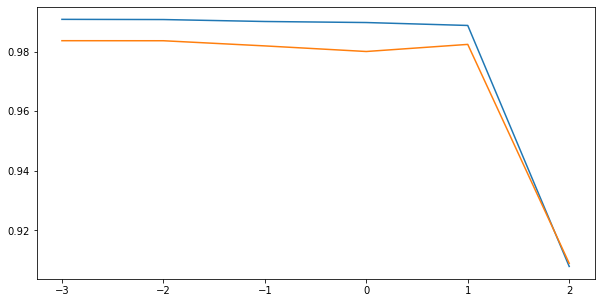

In [35]:
# 시각화 화기
import numpy as np

plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)

plt.show()

In [37]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print("train score :",lasso.score(train_scaled,train_target))
print("test score :",lasso.score(test_scaled,test_target))

train score : 0.9888067471131866
test score : 0.9824470598706695


In [38]:
# 기울기가 0으로 만든 횟수 출력
np.sum(lasso.coef_==0) # 즉, 컬럼을 15개밖에 사용하지 않음

40

In [39]:
np.sum(ridge.coef_==0) # 즉, 컬럼을 55개 다 씀 

0

> 위의 결과로 보아 딥러닝에서 L2규제인 Ridge를 더 많이 씀

In [40]:
print(ridge.coef_,ridge.intercept_)

[[14.47787925 13.57602998 11.63201165 11.8932325  11.77752923 10.31858308
  11.64021387 10.24123244  9.14825214  9.1286404   9.37990345  7.93726014
   9.58311316  8.15955267  7.04327687  9.72095255  8.3298696   7.26672501
   6.53665021  6.43472819  6.94020527  5.3741804   7.38991589  5.82395216
   4.56143295  7.76645254  6.21434216  4.98413166  4.08771371  8.05559909
   6.53087838  5.34623848  4.51313578  4.02885273  3.92836848  4.63068046
   2.89107701  5.27814021  3.52266185  2.06557497  5.85340221  4.09601374
   2.65350081  1.54170161  6.34114043  4.5959391   3.18229067  2.11733211
   1.4062423   6.72859789  5.00963933  3.63904662  2.63449235  2.00018677
   1.72767436]] [400.83333333]


In [41]:
print(lasso.coef_,lasso.intercept_) # 기울기가 0인 것이 많음 

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ] [400.83333333]
